In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [19]:
# load dataset
data = pd.read_csv("database/android/drebin-215-dataset-5560malware-9476-benign.csv")

In [20]:
# rename column name
data = data.rename(columns={"class":"label"})

# set suspicious = malware (1), benign (0)
data['label'] = data['label'].replace("S",1)
data['label'] = data['label'].replace("B",0)
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,label
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15027,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15029,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


<br><br>

Make train and test dataset.

In [24]:
# make train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"], test_size=0.3, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/android_train_70.csv", index=False)
X_test.to_csv("database/android_test_30.csv", index=False)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10525 entries, 9773 to 7270
Columns: 216 entries, transact to label
dtypes: int64(215), object(1)
memory usage: 17.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4511 entries, 13309 to 9410
Columns: 216 entries, transact to label
dtypes: int64(215), object(1)
memory usage: 7.5+ MB
None


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"], test_size=0.2, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/android_train_80.csv", index=False)
X_test.to_csv("database/android_test_20.csv", index=False)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12028 entries, 6307 to 7270
Columns: 216 entries, transact to label
dtypes: int64(215), object(1)
memory usage: 19.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 13309 to 7760
Columns: 216 entries, transact to label
dtypes: int64(215), object(1)
memory usage: 5.0+ MB
None


<br><br>

Make folds.

In [27]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(data)
print(kf)

KFold(n_splits=3, random_state=42, shuffle=True)


In [28]:
train_folds = []
test_folds = []

for train_index, test_index in kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index))
    train_folds.append(data.iloc[train_index])
    test_folds.append(data.iloc[test_index])

TRAIN: [    1     2     4 ... 15032 15033 15035] TEST: [    0     3     8 ... 15026 15029 15034]
10024
TRAIN: [    0     1     2 ... 15030 15033 15034] TEST: [   12    20    23 ... 15031 15032 15035]
10024
TRAIN: [    0     3     8 ... 15032 15034 15035] TEST: [    1     2     4 ... 15024 15030 15033]
10024


In [30]:
train_folds[0].to_csv('database/android_train_fold1.csv', index=False)
train_folds[1].to_csv('database/android_train_fold2.csv', index=False)
train_folds[2].to_csv('database/android_train_fold3.csv', index=False)

test_folds[0].to_csv('database/android_test_fold1.csv', index=False)
test_folds[1].to_csv('database/android_test_fold2.csv', index=False)
test_folds[2].to_csv('database/android_test_fold3.csv', index=False)

<br><br><br><br>

## data analysis

In [21]:
print(data.shape)

(15031, 216)


In [22]:
data.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,label
count,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,...,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,0.426585,0.446743,0.442818,0.413346,0.445080,0.487060,0.236711,0.330916,0.282483,0.312687,...,0.233384,0.017431,0.004258,0.434569,0.666356,0.290932,0.016034,0.007052,0.044974,0.369570
std,0.494597,0.497172,0.496736,0.492450,0.496991,0.499849,0.425077,0.470559,0.450222,0.463603,...,0.422999,0.130874,0.065115,0.495717,0.471530,0.454207,0.125609,0.083683,0.207253,0.482704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
benign = data.loc[ data['label'] == 0, : ]
malware = data.loc[ data['label'] == 1, : ]

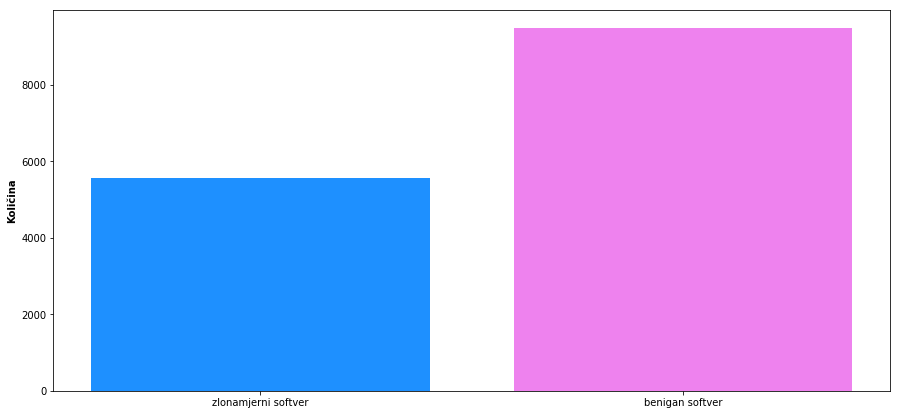

In [24]:
number_of_malicious = sum(data["label"])
number_of_benign = data.shape[0] - number_of_malicious

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(["zlonamjerni softver", "benigan softver"], [number_of_malicious, number_of_benign], color = ['dodgerblue', 'violet'])
plt.xticks(rotation='horizontal')
plt.ylabel('Količina', fontweight='bold')

plt.show()

In [25]:
print(abs(data.corrwith(data['label']).dropna()).sort_values()) 

READ_CONTACTS            0.000831
CLEAR_APP_CACHE          0.001791
GET_PACKAGE_SIZE         0.002410
ACCESS_WIFI_STATE        0.004997
WRITE_SECURE_SETTINGS    0.005872
                           ...   
ServiceConnection        0.557568
bindService              0.558808
onServiceConnected       0.561036
transact                 0.570093
label                    1.000000
Length: 216, dtype: float64


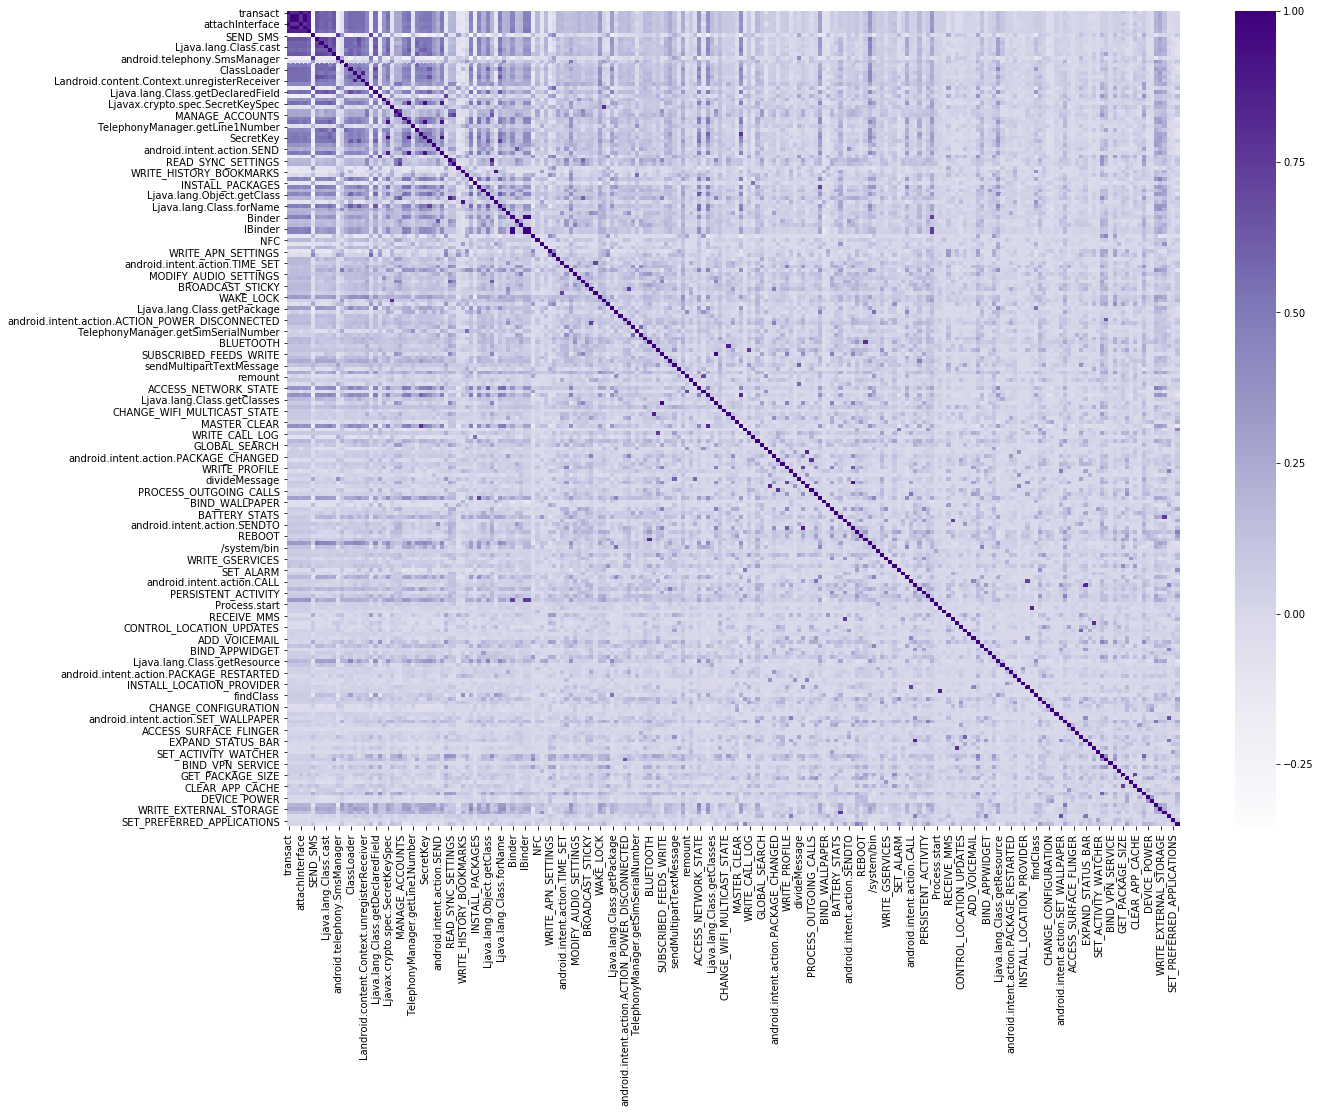

In [26]:
best_features_in_category_dataframe = pd.DataFrame()
index = 0

for features in data.columns:
    if (features == "label"):
        continue
    best_features_in_category_dataframe.insert(index, features, data[features])
    index = index + 1

plt.subplots(figsize=(20,15))
sn.heatmap(best_features_in_category_dataframe.corr(), cmap='Purples')

<br><br><br>

## feature selection

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [28]:
# 80 - 20

train80 = pd.read_csv("database/android/0/android_train_80.csv")
test80 = pd.read_csv("database/android/0/android_test_20.csv")

sel80 = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1))
sel80.fit(train80.drop(["label"], axis=1), train80["label"].values.ravel())

print(sum(sel80.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished


55


In [29]:
# only selected features
selected_features80 = pd.DataFrame(sel80.get_support())

selected_train80 = train80.drop(["label"], axis=1).loc[:,selected_features80.values.ravel()]
selected_train80["label"] = train80["label"]
selected_train80.to_csv("database/android/0/android_train_selected_80.csv", index=False)

selected_test80 = test80.drop(["label"], axis=1).loc[:,selected_features80.values.ravel()]
selected_test80["label"] = test80["label"]
selected_test80.to_csv("database/android/0/android_test_selected_20.csv", index=False)

print(selected_train80.columns.tolist())

['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder', 'SEND_SMS', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder', 'android.content.pm.Signature', 'android.telephony.SmsManager', 'READ_PHONE_STATE', 'getBinder', 'ClassLoader', 'Landroid.content.Context.registerReceiver', 'Ljava.lang.Class.getField', 'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS', 'RECEIVE_SMS', 'Ljava.lang.Class.getDeclaredField', 'READ_SMS', 'Ljavax.crypto.spec.SecretKeySpec', 'android.intent.action.BOOT_COMPLETED', 'MANAGE_ACCOUNTS', 'android.content.pm.PackageInfo', 'KeySpec', 'TelephonyManager.getLine1Number', 'HttpGet.init', 'Ljava.lang.Class.getMethod', 'System.loadLibrary', 'WRITE_SMS', 'android.telephony.gsm.SmsManager', 'WRITE_HISTORY_BOOKMARKS', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Object.getClass', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'ACCESS_LOCATION_EXTRA_C

In [30]:
# 70 - 30

train70 = pd.read_csv("database/android/0/android_train_70.csv")
test70 = pd.read_csv("database/android/0/android_test_30.csv")

sel70 = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1))
sel70.fit(train70.drop(["label"], axis=1), train70["label"].values.ravel())

print(sum(sel70.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished


50


In [31]:
# only selected features
selected_features70 = pd.DataFrame(sel70.get_support())

selected_train70 = train70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_train70["label"] = train70["label"]
selected_train70.to_csv("database/android/0/android_train_selected_70.csv", index=False)

selected_test70 = test70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_test70["label"] = test70["label"]
selected_test70.to_csv("database/android/0/android_test_selected_30.csv", index=False)

print(selected_train70.columns.tolist())

['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder', 'SEND_SMS', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder', 'android.content.pm.Signature', 'android.telephony.SmsManager', 'READ_PHONE_STATE', 'ClassLoader', 'Landroid.content.Context.registerReceiver', 'Ljava.lang.Class.getField', 'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS', 'RECEIVE_SMS', 'Ljava.lang.Class.getDeclaredField', 'READ_SMS', 'Ljavax.crypto.spec.SecretKeySpec', 'android.intent.action.BOOT_COMPLETED', 'android.content.pm.PackageInfo', 'TelephonyManager.getLine1Number', 'HttpGet.init', 'Ljava.lang.Class.getMethod', 'System.loadLibrary', 'WRITE_SMS', 'android.telephony.gsm.SmsManager', 'WRITE_HISTORY_BOOKMARKS', 'TelephonyManager.getSubscriberId', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'abortBroadcast', 'TelephonyManager.getDeviceId', 'RECEIVE_BOOT_COMPLETED', 'chmod', 'ACCESS_NETW

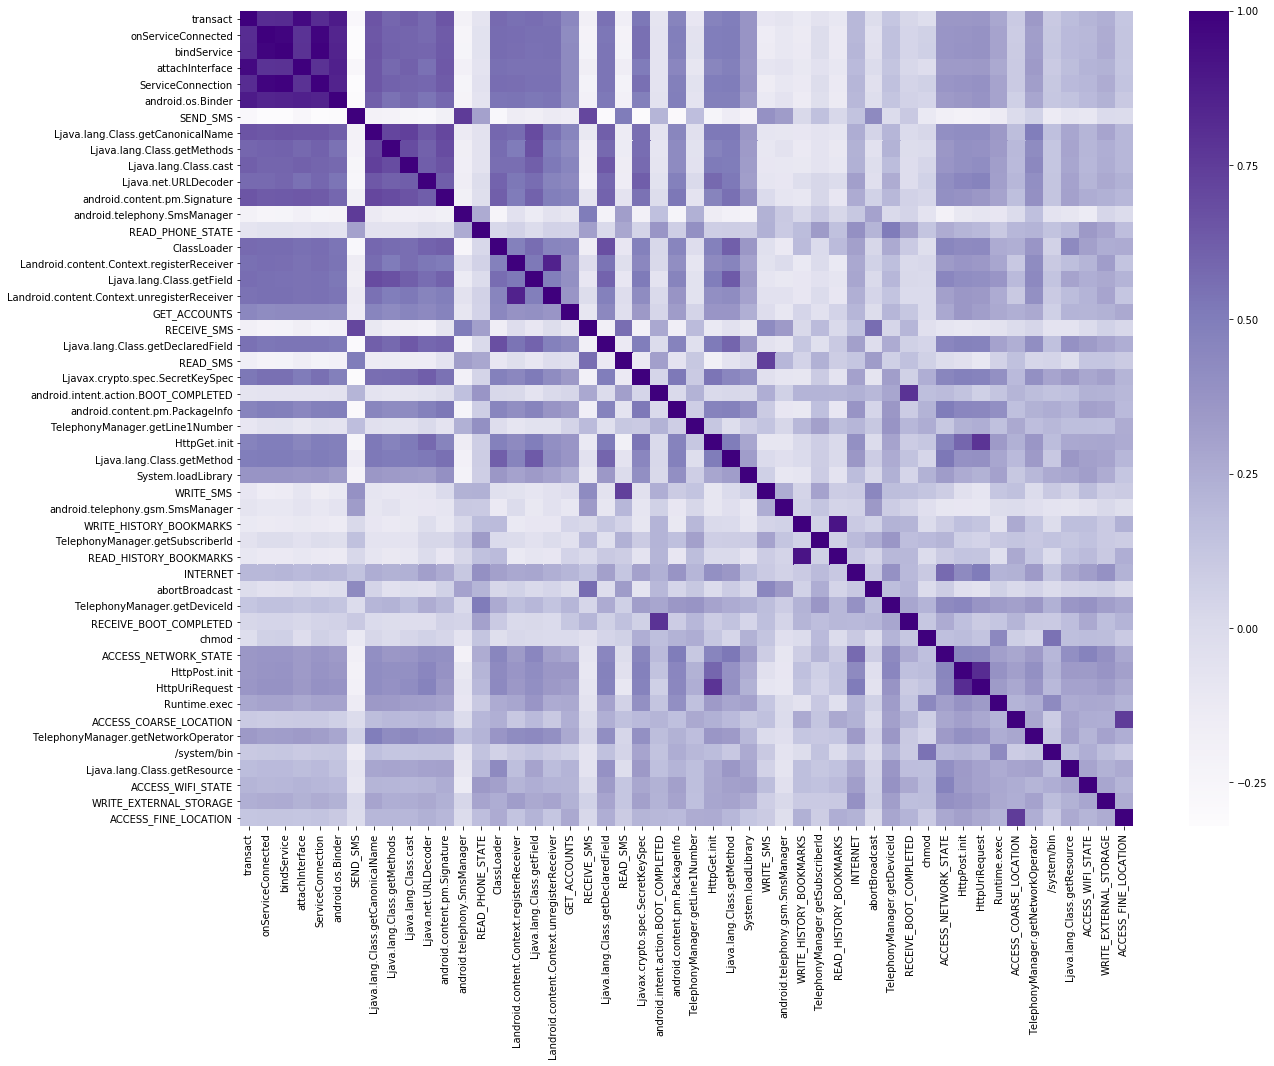

In [32]:
best_features_in_category_dataframe = pd.DataFrame()
index = 0

for features in selected_train70.columns:
    if (features == "label"):
        continue
    best_features_in_category_dataframe.insert(index, features, selected_train70[features])
    index = index + 1

plt.subplots(figsize=(20,15))
sn.heatmap(best_features_in_category_dataframe.corr(), cmap='Purples')

<br><br>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
# 80 - 20
train80 = pd.read_csv("database/android/0/android_train_80.csv")
test80 = pd.read_csv("database/android/0/android_test_20.csv")

rfecv_rf_ovo80 = RFECV(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1), 
                 step=1, 
                 cv=StratifiedKFold(n_splits=3),
                 scoring='roc_auc_ovo')

rfecv_rf_ovo80.fit(train80.drop(["label"], axis=1), train80["label"].values.ravel())

print(sum(rfecv_rf_ovo80.get_support()))

In [ ]:
# only selected features
selected_features_rfecv80 = pd.DataFrame(rfecv_rf_ovo80.get_support())

selected_train_rfecv80 = train80.drop(["label"], axis=1).loc[:,selected_features_rfecv80.values.ravel()]
selected_train_rfecv80["label"] = train80["label"]
selected_train_rfecv80.to_csv("database/android/0/android_train_selected_rfecv_80.csv", index=False)

selected_test_rfecv80 = test80.drop(["label"], axis=1).loc[:,selected_features_rfecv80.values.ravel()]
selected_test_rfecv80["label"] = test80["label"]
selected_test_rfecv80.to_csv("database/android/0/android_test_selected_rfecv_20.csv", index=False)

print(selected_train_rfecv80.columns.tolist())

In [ ]:
# 70 - 30
train70 = pd.read_csv("database/android/0/android_train_70.csv")
test70 = pd.read_csv("database/android/0/android_test_30.csv")

rfecv_rf_ovo70 = RFECV(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1), 
                 step=1, 
                 cv=StratifiedKFold(n_splits=3),
                 scoring='roc_auc_ovo')

rfecv_rf_ovo70.fit(train70.drop(["label"], axis=1), train70["label"].values.ravel())

print(sum(rfecv_rf_ovo70.get_support()))

In [ ]:
# only selected features
selected_features_rfecv70 = pd.DataFrame(rfecv_rf_ovo70.get_support())

selected_train_rfecv70 = train70.drop(["label"], axis=1).loc[:,selected_features_rfecv70.values.ravel()]
selected_train_rfecv70["label"] = train70["label"]
selected_train_rfecv70.to_csv("database/android/0/android_train_selected_rfecv_70.csv", index=False)

selected_test_rfecv70 = test70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_test_rfecv70["label"] = test70["label"]
selected_test_rfecv70.to_csv("database/android/0/android_test_selected_rfecv_30.csv", index=False)

print(selected_train70.columns.tolist())